# Applying the SCF method to a MW like galaxy with Bulge, disk and DM



In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.cm as cm
import numpy as np
from astropy import constants
from astropy import units as u
%matplotlib inline

import biff
from pygadgetreader import *
from halo import *
from soda import *

In [2]:
font = {'size':16, 'family':'serif'}
plt.matplotlib.rc('font', **font)

In [3]:
G_c = constants.G
G_c = G_c.to(u.kiloparsec**3 / (u.s**2 * u.Msun)) # 

# From N-body potential to kpc^2/s^2
# in gadget G=43007.1 
pot_factor = G_c/43007.1 #*1E10
r_s = 40.85

In [4]:
G_c.to((u.kiloparsec)**3.0 / (u.Gyr**2.0 * u.Msun))*1E10

<Quantity 44997.53324353495 kpc3 / (Gyr2 solMass)>

In [5]:
# constants.G.to(u.cm**3/(u.s**2.0 * u.gram)) / ((3.08567E21) * (1E5)**2 / 1.989E43) 

# To-do
1. Check 1.4 factor in the potential!
2. Play with more coefficients in $n, l, m$
3. Make 2d plots
4. Compare the value of the potential at a given positions

In [6]:
# Simulated data:
#../../data/MW_models/pm/MWN2vir_001.hdf5
MW_pos = readsnap('../../data/MW_models/triaxial/spherical_002.hdf5', 'pos', 'dm')
MW_vel = readsnap('../../data/MW_models/triaxial/spherical_002.hdf5', 'vel', 'dm')
MW_mass = readsnap('../../data/MW_models/triaxial/spherical_002.hdf5', 'mass', 'dm')
#MW_disk = readsnap('../../data/MW_models/triaxial/spherical_002.hdf5', 'pos', 'disk')
#MW_bulge = readsnap('../../data/MW_models/triaxial/spherical_002.hdf5', 'pos', 'bulge')
#MWf_bulge = readsnap('../../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_130.hdf5', 'pos', 'bulge')
MW_pot = readsnap('../../data/MW_models/triaxial/spherical_002.hdf5', 'pot', 'dm')

#MW_sph_pot = readsnap('../../data/MW_models/triaxial/spherical_002.hdf5', 'pot', 'dm')
#MW_sph_pos = readsnap('../../data/MW_models/triaxial/spherical_002.hdf5', 'pos', 'dm')

In [7]:
MW_pos_t, MW_vel_t, MW_mass_t, MW_pot_t = truncate(MW_pos, MW_vel, 500, MW_mass, MW_pot)

In [78]:
S_test, T_test = biff.compute_coeffs_discrete(MW_pos.astype(np.float64), (np.ones(len(MW_pos))).astype(np.float64), 15, 0, r_s=1)
pot_test = biff.potential(MW_pos.astype(np.float64), S_test, T_test, G=100, M=1, r_s=40.85)
pot_test2 = biff.potential(MW_pos.astype(np.float64), S_test, T_test, G=100, M=1, r_s=1)

In [79]:
pot_hernquist?

In [80]:
pot_test_teo = pot_hernquist(40.85,np.sqrt(MW_pos[:,0]**2.0 + MW_pos[:,1]**2.0 + MW_pos[:,2]**2), len(MW_pos), 100)
pot_test_teo2 = pot_hernquist(1,np.sqrt(MW_pos[:,0]**2.0 + MW_pos[:,1]**2.0 + MW_pos[:,2]**2), len(MW_pos), 100)


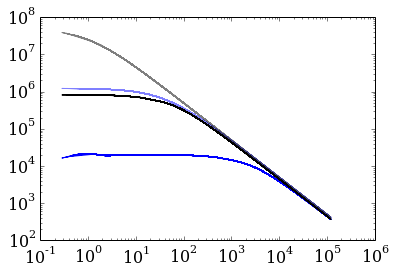

In [81]:
plt.loglog(np.sqrt(MW_pos[:,0]**2.0 + MW_pos[:,1]**2.0 + MW_pos[:,2]**2), np.abs(pot_test))
plt.loglog(np.sqrt(MW_pos[:,0]**2.0 + MW_pos[:,1]**2.0 + MW_pos[:,2]**2), np.abs(pot_test_teo), c='b', alpha=0.5)

plt.loglog(np.sqrt(MW_pos[:,0]**2.0 + MW_pos[:,1]**2.0 + MW_pos[:,2]**2), np.abs(pot_test2), c='k')
plt.loglog(np.sqrt(MW_pos[:,0]**2.0 + MW_pos[:,1]**2.0 + MW_pos[:,2]**2), np.abs(pot_test_teo2), c='k', alpha=0.5)
#plt.xlim(1, 1E5)

In [76]:
Total_Mass = sum(MW_mass)
Total_Mass_t = sum(MW_mass_t)

Total_Mass*1E10

1855294976849.1089

In [58]:
## Code taken from (https://github.com/adrn/biff/blob/master/notebooks/Plummer%20test.ipynb)
Sspheric, Tspheric = biff.compute_coeffs_discrete(MW_pos.astype(np.float64), (MW_mass*1E10).astype(np.float64), 15, 0, 1)


In [82]:
rho_Biff = biff.density(MW_pos_t.astype(np.float64), Sspheric, Tspheric, Total_Mass_t, r_s)
pot_Biff = biff.potential(MW_pos_t.astype(np.float64), Sspheric, Tspheric, G_c.value, M=1, r_s=1)

In [83]:
def pot_err(pot_nb, pot_biff):
    err = (np.log10(np.abs(pot_nb)) - np.log10(np.abs(pot_biff)))/(np.log10(np.abs(pot_nb)))
    #print(np.log10(np.abs(pot_nb)), np.log10(np.abs(pot_bitt)))
    return err

In [84]:
r_MW_t = np.sqrt(MW_pos_t[:,0]**2.0 + MW_pos_t[:,1]**2.0 + MW_pos_t[:,2]**2.0)
#r_MW = np.sqrt(MW[:,0]**2.0 + MW[:,1]**2.0 + MW[:,2]**2.0)
#rho_teo_s = profiles.dens_hernquist(40.85, np.sort(r_MW_t), Total_Mass) 
rho_teo = profiles.dens_hernquist(40.85, r_MW_t, 0, 0, Total_Mass_t) 
pot_teo = profiles.pot_hernquist(40.85, r_MW_t, Total_Mass_t*1E10, G_c.value) 

(1, 1000.0)

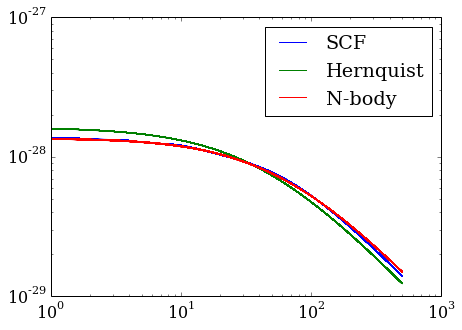

In [85]:
plt.figure(figsize=(7,5))
plt.loglog(r_MW_t, np.abs(pot_Biff), label='SCF')
plt.loglog(r_MW_t, np.abs(pot_teo), label='Hernquist')
plt.loglog(r_MW_t, np.abs(MW_pot_t)*pot_factor*1E10, label='N-body')
plt.legend(loc='best')

plt.xlim(1, 1E3)

In [86]:
# Writing coefficients into a file.
def writting_coeff(name, S, T):
    f = open(name, 'w')
    f.write("# S    T \n")
    S1d = np.reshape(S, (np.size(S),1))
    T1d = np.reshape(T, (np.size(T),1))
    for i in range(len(S1d)):
        f.write("%f %f \n"%(S1d[i][0], T1d[i][0]))
    f.close

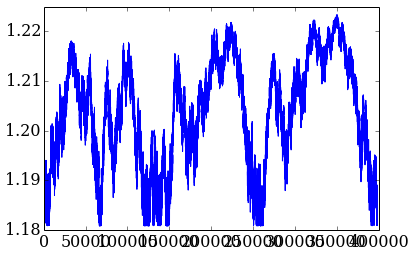

In [26]:
EP = pot_err(pot_Biff, MW_pot_t)
plt.plot(EP)

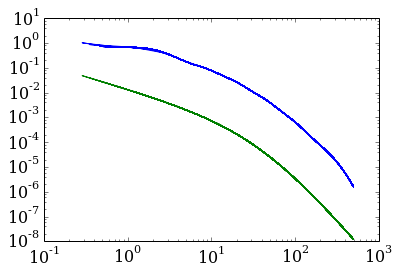

In [14]:
plt.loglog(r_MW_t, rho_Biff)
plt.loglog(r_MW_t, rho_teo)

In [12]:
def SCF_diff_radii(pos, M, r_lim):
    index = np.where(np.sqrt(pos[:,0]**2.0+pos[:,1]**2.0+pos[:,2]**2.0)<r_lim)[0]
    Sspheric, Tspheric = biff.compute_coeffs_discrete(pos[index].astype(np.float64), M[index].astype(np.float64),15, 0, r_s)
    rho_Biff = biff.density(pos[index].astype(np.float64), Sspheric, Tspheric, sum(M), r_s)
    pot_Biff = biff.potential(pos[index].astype(np.float64), Sspheric, Tspheric, 43007.1, sum(M), r_s)
    r = np.sqrt(pos[index,0]**2.0+pos[index,1]**2.0+pos[index,2]**2.0)
    return r, rho_Biff, pot_Biff


    

(1, 300)

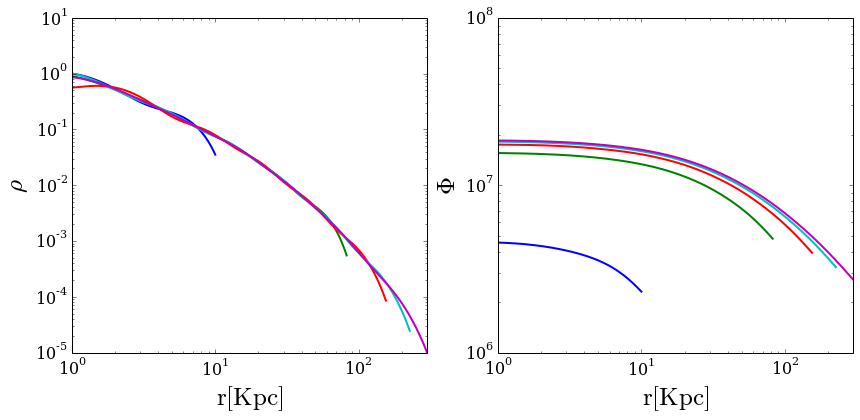

In [13]:
rcuts = np.linspace(10, 300, 5)
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
for i in range(len(rcuts)):
    r, rho, pot = SCF_diff_radii(MW_pos_t, MW_mass_t, rcuts[i])
    sorting = np.argsort(r, axis=0)
    plt.loglog(r[sorting], rho[sorting], lw=2)
    #plt.loglog(r[sorting], np.abs(pot[sorting]))


plt.xlabel('$\mathrm{r[Kpc]}$', fontsize=25)
plt.ylabel(r'$\mathrm{\rho}$', fontsize=25)
plt.xlim(1, 300)

plt.subplot(1, 2, 2)
for i in range(len(rcuts)):
    r, rho, pot = SCF_diff_radii(MW_pos_t, MW_mass_t, rcuts[i])
    sorting = np.argsort(r, axis=0)
    plt.loglog(r[sorting], np.abs(pot[sorting]), lw=2)
    #plt.loglog(r[sorting], np.abs(pot[sorting]))
    
    
plt.xlabel('$\mathrm{r[Kpc]}$', fontsize=25)
plt.ylabel('$\mathrm{\Phi}$', fontsize=25)
plt.xlim(1, 300)

In [15]:
def sortingx(x,y):
    sort_arg = np.argsort(x, axis=0)
    return x[sort_arg], y[sort_arg]

In [16]:
# Sorting density arrays
dens_mw1 = np.zeros((len(r_MW), 2))
dens_mw1[:,0], dens_mw1[:,1] = sortingx(r_MW, MWbfe_rho)

dens_mw2 = np.zeros((len(r_MW), 2))
dens_mw2[:,0], dens_mw2[:,1] = sortingx(r_MW, MWbfe_rho2)

dens_teo = np.zeros((len(r_MW), 2))
dens_teo[:,0], dens_teo[:,1] = sortingx(r_MW, rho_teo)

residuals1 = np.zeros((len(r_MW), 2))
residuals1[:,0], residuals1[:,1] = sortingx(r_MW, (dens_mw1[:,1] - dens_teo[:,1])/dens_teo[:,1])

residuals2 = np.zeros((len(r_MW), 2))
residuals2[:,0], residuals2[:,1] = sortingx(r_MW, (dens_mw2[:,1] - (dens_teo[:,1]))/dens_teo[:,1])


NameError: name 'r_MW' is not defined

In [ ]:
#fig, ax1 = plt.subplots(1, 1, figsize=[5, 5])
#gs = gridspec.GridSpec(1, 1, width_ratios=[1,1], height_ratios=[1,1])
plt.figure(figsize=(5,5))
#ax1 = plt.subplot(gs[0])
plt.loglog(dens_mw1[:,0], dens_mw1[:,1], label='$n_{max} = 1$', lw=1.5, alpha=1)
plt.loglog(dens_mw2[:,0], dens_mw2[:,1], label='$n_{max} = 10$', lw=1.5, alpha=1)
#a.loglog(dens_mw3[:,0], dens_mw3[:,1], label='$n_{max} = 20$', lw=2, alpha=1)
#ax1.loglog(r_MW_t, MWbfe_rho4, label='$n_{max} = 5,\ l_{max}=5$')
plt.loglog(dens_teo[:,0], dens_teo[:,1], label='$\mathrm{Analytic}$', lw=1.5, c='k')
plt.legend(fontsize=15, loc='best')
plt.ylabel(r'$\rho$', fontsize=25)
plt.xlabel(r'$r[kpc]$', fontsize=25)
#plt.xlim(1E-1, 1E3)

#ax2 = plt.subplot(gs[1])
#ax2.semilogx(residuals1[:,0], residuals1[:,1], lw=1.5)
#ax2.semilogx(residuals2[:,0], residuals2[:,1], lw=1.5)
#ax2.semilogx(residuals3[:,0], residuals3[:,1], lw=1.5)
#ax2.semilogx(residuals4[:,0], residuals4[:,1])
#ax2.set_xlabel(r'$r[kpc]$', fontsize=25)
#ax2.set_ylabel(r'$\Delta \rho / \rho$', fontsize=25)
#ax2.set_ylim(0.1, 0.4)
#ax2.set_xlim(1E-1, 1E3)
plt.savefig('rho_MW.png', dpi=300, bbox_inches='tight')

In [ ]:
r = np.linspace(0.1, 500, 1000)
hernpot = profiles.pot_hernquist(40.85, r_MW, Total_Mass)


#disk_pot = profiles.pot_mn(0.638, 2.9,r, 0, 0, 5.78E10)
#bulge_pot = profiles.pot_hernquist(0.7, r, 1.4E10)

#bulge_pot_hex = profiles.pot_hernquist(0.7, r_MW_t, 1.4E10)
#disk_pot_hex = profiles.pot_mn(0.638, 2.9, r_MW_t, 0, 0, 5.78E10)



In [ ]:
factor=1.0
pot_mw1 = np.zeros((len(r_MW), 2))
pot_mw1[:,0], pot_mw1[:,1] = sortingx(r_MW, np.abs(MWbfe_pot))

pot_teo = np.zeros((len(r_MW), 2))
pot_teo[:,0], pot_teo[:,1] = sortingx(r_MW, np.abs(hernpot))


pot_res1 = np.zeros((len(r_MW), 2))
pot_res1[:,0], pot_res1[:,1] = sortingx(r_MW, (pot_mw1[:,1]-pot_teo[:,1])/pot_teo[:,1])


#pot_mw2 = np.zeros((len(r_MW_t), 2))
#pot_mw2[:,0], pot_mw2[:,1] = sortingx(r_MW_t, np.abs(MWbfe_pot/factor + bulge_pot_hex + disk_pot_hex))

#pot_mw3 = np.zeros((len(r_MW_t), 2))
#pot_mw3[:,0], pot_mw3[:,1] = sortingx(r_MW_t, np.abs(MW_pot_t)*pot_factor)

#pot_mw4 = np.zeros((len(r_MW_t), 2))
#pot_mw4[:,0], pot_mw4[:,1] = sortingx(r_MW_t, np.abs(MWbfe_pot2/factor + bulge_pot_hex + disk_pot_hex))


#pot_mw5 = np.zeros((len(r_MW_t), 2))
#pot_mw5[:,0], pot_mw5[:,1] = sortingx(r_MW_t, np.abs(MWbfe_pot4/factor + bulge_pot_hex + disk_pot_hex))

In [ ]:
# N-body-potentia
R_mw = np.sqrt(MW[:,0]**2.0 + MW[:,1]**2.0 + MW[:,2]**2.0)
R, POT = sortingx(R_mw, MW_pot)

In [ ]:
plt.figure(figsize=(5,5))
plt.loglog(pot_mw1[:,0], pot_mw1[:,1]*h, lw=1.5, label='$\mathrm{SCF}$')
plt.loglog(pot_teo[:,0], pot_teo[:,1], c='k', lw=1.5, label='$\mathrm{Theo}$')
plt.loglog(R, np.abs(POT)*pot_factor/1E10/h, label='$\mathrm{N-body}$')
plt.xlabel('$r[kpc]$', fontsize=30)
plt.ylabel('$\phi$', fontsize=30)
plt.legend(loc='best', fontsize=15)
#plt.ylim(1E-39, 1E-38)
plt.savefig('scf_mw_pot.png', bbox_inches='tight', dpi=300)

In [ ]:
plt.plot(pot_res1[:,0], pot_res1[:,1], c='k', lw=1.5)

In [ ]:
print(np.max(MWbfe_pot))

In [ ]:
MW_pot_dif = np.abs(MW_pot_t)*pot_factor.value - np.abs(MWbfe_pot)/factor

In [ ]:
x_MW1_dif, y_MW1_dif, potMW1_dif = pot_contour(MW_t[:,0], MW_t[:,1], MW_pot_dif, 100)



In [ ]:
y_MW2_dif, z_MW2_dif, potMW2_dif = pot_contour(MW_t[:,1], MW_t[:,2], MW_pot_dif, 100)

In [ ]:
plt.scatter(MW_t[:,1], MW_t[:,2],c= MW_pot_dif, s=0.1, edgecolor='none')
plt.colorbar()
plt.xlim(-40, 40)
plt.ylim(-40, 40)

In [ ]:
plt.contourf(x_MW1_dif, y_MW1_dif, potMW1_dif, origin='lower', cmap = plt.cm.bone)
plt.colorbar()
plt.xlim(-100, 100)
plt.ylim(-100, 100)


In [ ]:
plt.contourf(y_MW2_dif, z_MW2_dif, potMW2_dif, origin='lower', cmap = plt.cm.bone)
plt.colorbar()
plt.xlim(-100, 100)
plt.ylim(-100, 100)

In [ ]:
#plt.semilogx(pot_mw1[:,0], (pot_mw1[:,1]-pot_mw3[:,1])/pot_mw3[:,1], label='$n_{max} = 1$', lw=2)
plt.semilogx(pot_mw2[:,0], (pot_mw2[:,1]-pot_mw3[:,1])/pot_mw3[:,1], label='$n_{max} = 1$', lw=2)
plt.semilogx(pot_mw4[:,0], (pot_mw4[:,1]-pot_mw3[:,1])/pot_mw3[:,1], label='$n_{max} = 1$', lw=2)
plt.semilogx(pot_mw5[:,0], (pot_mw5[:,1]-pot_mw3[:,1])/pot_mw3[:,1], label='$n_{max} = 1$', lw=2)

In [ ]:
plt.figure(figsize=(8,6))
plt.loglog(pot_mw3[:,0],pot_mw3[:,1], label='$N-body$')
plt.loglog(r, np.abs(hernpot + disk_pot + bulge_pot), label='$Analytic:\ Halo + Disk + Bulge$', lw=1.5, ls='--', c='k')
plt.loglog(r, np.abs(hernpot), label='$Analytic: Halo$', lw=1.5, ls=':', c='k')
plt.loglog(pot_mw1[:,0], pot_mw1[:,1], label='$n_{max} = 1$', lw=2)
plt.loglog(pot_mw2[:,0], pot_mw2[:,1], label='$n_{max} = 1 + Disk + Bulge$', lw=2)
#plt.loglog(r_MW_t, np.abs(MWbfe_pot3), label='$n_{max} = 20$')
#plt.loglog(r_MW_t, np.abs(MWbfe_pot4), label='$n_{max} = 5, l_{max}=5$')
plt.xlim(1, 500)
plt.ylim(1E-29, 4E-28)


plt.legend(fontsize=15, loc='best')
plt.xlabel(r'$r[kpc]$', fontsize=25)
plt.ylabel(r'$|\Phi|[Kpc^2/s^2]$', fontsize=25)

plt.savefig('pot_MW.png', dpi=300, bbox_inches='tight')


## Conclusions from the above plot:

1. N-body potential of DM particles, feel the potential of the disk + buge (blue line)
2. HEX potential doesn't account for disk and bulge. I am going to use the analytic forms of this potentials as a first approx.
3. There is a factor of ~1.45 between the HEX potential and N-body!!!

In [ ]:
def potential_residuals(pot_nbody, pot_hex):
    pot_factor = G_c/43007.1*1E10 
    pot_nbody = pot_nbody * pot_factor.value
    # Analytic Disk & Bulge potentials 
    bulge_pot_hex = profiles.pot_hernquist(0.7, r_MW_t, 1.4E10)
    disk_pot_hex = profiles.pot_mn(0.638, 2.9,r_MW_t, 0, 0, 5.78E10)
    pot_hex = pot_hex/1.5 + bulge_pot_hex + disk_pot_hex
    pot_res = (pot_hex - pot_nbody) / pot_nbody
    return pot_res

In [ ]:
MW_pot1d = np.reshape(MW_pot_t, (len(MW_pot_t), 1))

In [ ]:
def pot_contour(x, y, pot, n_bins):
    x_pot = np.linspace(min(x), max(x), n_bins)
    y_pot = np.linspace(min(y), max(y), n_bins)
    pot_grid = np.zeros((n_bins,  n_bins))

    for i in range(1,n_bins):
        for j in range(1,n_bins):
            index = np.where((x<x_pot[i]) & (x>x_pot[i-1]) & (y<y_pot[j]) & (y>y_pot[j-1]))[0]
            pot_grid[i][j] = np.mean(pot[index])
    return x_pot, y_pot, pot_grid

In [ ]:
pot_factor = G_c/43007.1*1E10 
x_MW1, y_MW1, potMW1 = pot_contour(MW_t[:,0], MW_t[:,1], MW_pot_t*pot_factor.value, 100)

In [ ]:
MW_pot_b = MWbfe_pot/factor + bulge_pot_hex + disk_pot_hex
x_MW1_b, y_MW1_b, potMW1_b = pot_contour(MW_t[:,0], MW_t[:,1], MW_pot_b, 100)

In [ ]:
MW_pot_res = (MW_pot_b - MW_pot_t*pot_factor.value)/(MW_pot_t*pot_factor.value)
x_MW1_r, y_MW1_r, potMW1_r = pot_contour(MW_t[:,0], MW_t[:,1], MW_pot_res, 400)

In [ ]:
MW_pot3_b = MWbfe_pot3/factor + bulge_pot_hex + disk_pot_hex
x_MW3_b, y_MW3_b, potMW3_b = pot_contour(MW_t[:,0], MW_t[:,1], MW_pot3_b, 100)

In [ ]:
MW_pot3_res = (MW_pot3_b - MW_pot_t*pot_factor.value)/(MW_pot_t*pot_factor.value)
x_MW3_r, y_MW3_r, potMW3_r = pot_contour(MW_t[:,0], MW_t[:,1], MW_pot3_res, 100)

In [ ]:
levels1 = np.linspace(np.nanmin(potMW1), np.nanmax(potMW1), 15)
levels2 = np.linspace(np.nanmin(potMW1_b), np.nanmax(potMW1_b), 15)
levels3 = np.linspace(np.nanmin(potMW1_r), np.nanmax(potMW1_r), 15)

plt.figure(figsize=(21, 5))
plt.subplot(1,3,1)
plt.contourf(x_MW1, y_MW1, potMW1, origin='lower', cmap = plt.cm.bone, levels=levels1)
plt.axis('equal')
plt.colorbar()
plt.xlabel('$x[kpc]$', fontsize=30)
plt.ylabel('$y[kpc]$', fontsize=30)
plt.title('$\Phi_{N-Body}$', fontsize=35, y=1.05)

plt.subplot(1,3,2)
plt.contourf(x_MW1_b, y_MW1_b, potMW1_b, origin='lower', cmap = plt.cm.bone, levels=levels2)
plt.axis('equal')
plt.colorbar()
plt.xlabel('$x[kpc]$', fontsize=30)
plt.title('$\Phi_{SCF}$', fontsize=35, y=1.05)


plt.subplot(1,3,3)
plt.contourf(x_MW1_r, y_MW1_r, potMW1_r, origin='lower', cmap = plt.cm.bone, levels=levels3)
plt.axis('equal')
plt.colorbar()
plt.xlabel('$x[kpc]$', fontsize=30)
plt.title('$\Delta \Phi / \Phi$', fontsize=35, y=1.05)

#plt.savefig('MW_potn1.png', dpi=300, bbox_inches='tight')

In [ ]:
levels4 = np.linspace(np.nanmin(potMW1), np.nanmax(potMW1), 15)
levels5 = np.linspace(np.nanmin(potMW3_b), np.nanmax(potMW3_b), 15)
levels6 = np.linspace(np.nanmin(potMW3_r), np.nanmax(potMW3_r), 15)

plt.figure(figsize=(21, 5))
plt.subplot(1,3,1)
plt.contourf(x_MW1, y_MW1, potMW1, origin='lower', cmap = plt.cm.bone, levels=levels4)
plt.axis('equal')
plt.colorbar()
plt.xlabel('$x[kpc]$', fontsize=30)
plt.ylabel('$y[kpc]$', fontsize=30)
plt.title('$\Phi_{N-Body}$', fontsize=35, y=1.05)

plt.subplot(1,3,2)
plt.contourf(x_MW3_b, y_MW3_b, potMW3_b, origin='lower', cmap = plt.cm.bone, levels=levels5)
plt.axis('equal')
plt.colorbar()
plt.xlabel('$x[kpc]$', fontsize=30)
plt.title('$\Phi_{SCF}$', fontsize=35, y=1.05)


plt.subplot(1,3,3)
plt.contourf(x_MW3_r, y_MW3_r, potMW3_r, origin='lower', cmap = plt.cm.bone, levels=levels6)
plt.axis('equal')
plt.colorbar()
plt.xlabel('$x[kpc]$', fontsize=30)
plt.title('$\Delta \Phi / \Phi$', fontsize=35, y=1.05)

#plt.savefig('MW_potn20.png', dpi=300, bbox_inches='tight')

In [ ]:
index_slide = np.where((MW2_t[:,0]<10) & (MW2_t[:,0]>-10))[0]

print len(index_slide)

In [ ]:
pot_factor = G_c/43007.1*1E10 

x_MW2, y_MW2, potMW2 = pot_contour(MW2_t[index_slide,0], MW2_t[index_slide,1], MW2_pot_t[index_slide]*pot_factor.value, 100)

In [ ]:
y2_MW2, z2_MW2, potMW2 = pot_contour(MW2_t[index_slide,1], MW2_t[index_slide,2], MW2_pot_t[index_slide]*pot_factor.value, 100)

In [ ]:
plt.contourf(x_MW2, y_MW2, potMW1, origin='lower', cmap = plt.cm.bone)
plt.axis('equal')


In [ ]:
plt.contourf(y2_MW2, z2_MW2, np.log10(np.abs(potMW1)), origin='lower', cmap = plt.cm.bone)
plt.axis('equal')
plt.colorbar()

In [ ]:
plt.scatter(MW2_t[index_slide,1], MW2_t[index_slide,2], c=(np.abs(MW2_pot_t[index_slide]))
            , edgecolors='', s=0.1)
plt.axis('equal')

In [ ]:
plt.scatter(MW_disk[:,1], MW_disk[:,2], s=0.1, alpha=0.2)
plt.scatter(MW_bulge[:,1], MW_bulge[:,2], s=0.1, alpha=0.2, edgecolor='none', c='r')
plt.xlim(-40, 40)
plt.ylim(-40, 40)


## Coefficients Analysis & Weinberg 96

Modified algorithm:
    
1. Accumulate contribution to the coefficientes $\hat{a}_j$ and the covariance matrix in a loop over all
particles and construct the outer-product matrix $S_{jk}$. 

$S_{kl} = \hat{a}_k \hat{a}_l$

2. Solve the eigenvalue problem in order to construct the transformation $T$ to the best fitting uncorrelated basis. if $e^{[k]}$ are the eigenvectors with eigenvalues $\lambda_j$, $T_{j,k}= e_j^{[k]}$ defines de transformation.

3. Transfor the coefficient estimates $\hat{a}_j$ to the new basis (denoted by star) , $\hat{a}_{j}^* = \sum_k T_{jk}\hat{a}_k$ and use $var(\hat{a}^*)_{jj} = \sum_{kl}T_{jk} var(\hat)_{kl}T^{t}_{lj} $ to compute $b_{j}^*$

In [266]:
from scipy import linalg

In [542]:
#SMW4, TMW4, nlmsMW4 = STnlm(MW, MW_mass, 40.85, 10, 10)
#MWbfe_pot4 = biff.potential(np.ascontiguousarray(np.double(MW)), SMW4, TMW4, 10, 10, G_c.value, Total_Mass, 40.85)
#MWbfe_rho4 = biff.density(np.ascontiguousarray(np.double(MW)), SMW4, TMW4, 10, 10, Total_Mass, 40.85)


SMW5, TMW5, nlmsMW5 = STnlm(MW, MW_mass, 40.85, 10, 10)
MWbfe_pot5 = biff.potential(np.ascontiguousarray(np.double(MW)), SMW5, TMW5, 10, 10, G_c.value, Total_Mass, 40.85)
MWbfe_rho5 = biff.density(np.ascontiguousarray(np.double(MW)), SMW5, TMW5, 10, 10, Total_Mass, 40.85)

In [347]:
## Eq. 8 Weinberg 96
def smooth_b(a):
    b = np.zeros(len(a))
    for i in range(1,len(a)):
        b[i] = 1.0/(1.0 + np.var(a)/a[i-1]**2)
    return b

In [342]:
def MISE(a):
    b = smooth_b(a)
    D = np.zeros(len(a))
    for i in range(len(a)):
        D[i] = np.sum(b[:i+1]**2 * np.var(a) + (b[:i+1]-1)**2.0*a[:i+1]**2.0)
    return D

In [455]:
# Eq 11 Weinberg 96
def S_matrix(a):
    a = a.flatten()
    S = np.zeros((len(a), len(a)))
    for i in range(len(a)):
        for j in range(len(a)):
            S[i][j] = a[i]*a[j]
    return S

# Solving the eigenvalue problem
def T_tranformation(S):
    lambdas, eigenv = linalg.eig(S)
    T = eigenv
    return T, lambdas

# Eq 12 Weinberg 96.
def lambda_prime(lambdas):
    F = np.zeros(len(lambdas))
    print(len(F))
    for i in range(len(F)):
        F[i] = np.sum(lambdas.real[:i])/np.sum(lambdas.real)
    return F

def lambda_prime2(lambdas):
    lambdas_lm = lambdas.real[8::9]
    F = np.zeros(len(lambdas_lm))
    print(len(F))
    for i in range(len(F)):
        F[i] = np.sum(lambdas_lm[:i])/np.sum(lambdas.real)
    return F

def a_prime(T, a):
    return np.dot(T.real,a)


def cov_matrix(a):
    cov_m = np.zeros([len(a), len(a)])
    for i in range(len(a)):
        for j in range(len(a)):
            cov_m[i][j] = np.cov((a[i], a[j]))
    return cov_m

def var_aprime(T, cov_a):
    T_daga = np.conjugate(T).T
    var_prime = (np.dot(T, np.dot(cov_a, T_daga)))
    return var_prime.real

            

In [438]:
print(SMW5[:,2,2])
print(SMW5.flatten()[8::9])
xx = (SMW5.flatten())


print(xx)
#print(S3)


[ -1.17888926e-02   1.42749641e-03  -3.53617543e-04   1.54359517e-04
   3.52780445e-05  -1.13992115e-05  -1.88047185e-05   1.59243029e-05
   1.52812217e-06  -2.96432814e-06   4.66771031e-07  -5.67998683e-07
  -3.83792721e-08  -1.01831593e-06   1.14662997e-06  -3.84307131e-07
  -3.18736401e-07   2.92764411e-07  -2.36170187e-07   1.00153208e-07]
[ -1.17888926e-02   1.42749641e-03  -3.53617543e-04   1.54359517e-04
   3.52780445e-05  -1.13992115e-05  -1.88047185e-05   1.59243029e-05
   1.52812217e-06  -2.96432814e-06   4.66771031e-07  -5.67998683e-07
  -3.83792721e-08  -1.01831593e-06   1.14662997e-06  -3.84307131e-07
  -3.18736401e-07   2.92764411e-07  -2.36170187e-07   1.00153208e-07]
[  1.28041545e+00   0.00000000e+00   0.00000000e+00  -2.09640229e-03
  -5.77292922e-03   0.00000000e+00   3.51747188e-03  -1.54030982e-03
  -1.17888926e-02   6.46694670e-03   0.00000000e+00   0.00000000e+00
   1.09884873e-03   1.75655816e-03   0.00000000e+00   5.76174043e-04
   5.73412430e-04   1.42749641e-

In [581]:
S50 = SMW5[:,0,0]
S51 = SMW5[:,1,1]
S52 = SMW5[:,2,2]
S53 = SMW5[:,3,3]
S54 = SMW5[:,4,4]
S55 = SMW5[:,5,5]
S56 = SMW5[:,6,6]
S57 = SMW5[:,7,7]
S58 = SMW5[:,8,8]
S59 = SMW5[:,9,9]
S510 = SMW5[:,10,10]

S5t = np.array([S50, S51, S52, S53, S54]).reshape(1,55)


In [582]:
S2 = SMW2.flatten()
S3 = SMW3.flatten()
S4 = SMW4.flatten()
S5 = SMW5.flatten()

In [583]:
b2 = smooth_b(S2)
b3 = smooth_b(S3)
b4 = smooth_b(S4)
b5 = smooth_b(S5t[0])

D2 = MISE(S2)
D3 = MISE(S3)
D4 = MISE(S4)
D4 = MISE(S5t[0])

/home/xozidok/work/github/LMC-MW/code/SCF/weinberg_method.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  b[i] = 1.0/(1.0 + np.var(a)/a[i-1]**2)


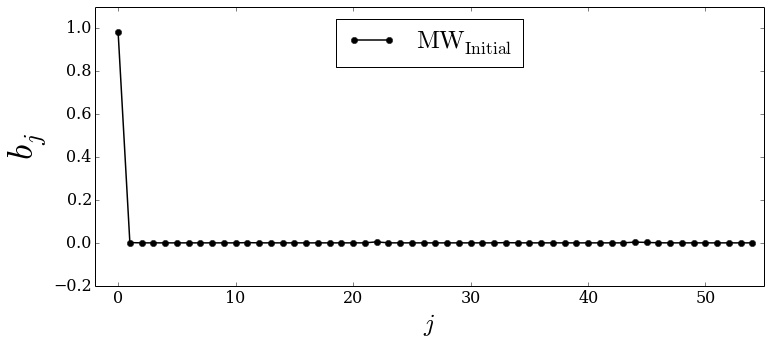

In [590]:
plt.figure(figsize=(12,5))
#plt.plot(1, 3, 1)
plt.plot(b5, lw=1.5, c='k', marker='o', label='$\mathrm{MW_{Initial}}$')
plt.xlim(-2, 55)
plt.ylim(-0.2, 1.1)
plt.xlabel('$j$', fontsize=25)
plt.ylabel('$b_j$', fontsize=35)
plt.legend(loc='upper center', fontsize=25)
#plt.subplot(1, 3, 2)
#plt.plot(b5[11:22])
#plt.subplot(1, 3, 3)
#plt.plot(b5[22:33])
plt.savefig('bj_MWi.png', bbox_inches='tight')

In [456]:
S_matrix_test2 = S_matrix(S2)
T_trans2, L2 = T_tranformation(S_matrix_test2)
F2 = lambda_prime(L2) 



S_matrix_test3 = S_matrix(S3)
T_trans3, L3 = T_tranformation(S_matrix_test3)
F3 = lambda_prime(L3) 


S_matrix_test4 = S_matrix(S4)
T_trans4, L4 = T_tranformation(S_matrix_test4)
F4 = lambda_prime(L4) 



S_matrix_test5 = S_matrix(S5)
T_trans5, L5 = T_tranformation(S_matrix_test5)
F5 = lambda_prime2(L5) 
#a_new = a_prime(T_trans, S2)
#a_cov = cov_matrix(S2)



11
21
1331
20


In [462]:
print(L2.real)
print(L5.real)



[  1.63950610e+00   0.00000000e+00   1.38271396e-22  -2.20177770e-23
   1.02395418e-23   7.79451069e-24   1.10867846e-24  -3.03191834e-25
   4.16471873e-26  -1.54075468e-28  -3.51951005e-26]
[  1.63970516e+00  -2.63045649e-20  -4.10454101e-21  -4.10454101e-21
   1.80405857e-21   1.80405857e-21  -7.82246370e-22  -7.82246370e-22
   5.98443533e-22   3.03762622e-22   3.03762622e-22  -1.45154900e-22
  -7.07109746e-23  -7.07109746e-23  -7.38657722e-23   3.00707675e-23
   3.00707675e-23  -2.57455951e-23  -7.46453253e-24  -7.46453253e-24
   1.33163093e-23  -4.32171515e-24  -4.32171515e-24  -2.58482837e-25
  -2.58482837e-25   2.09180865e-24   2.09180865e-24   2.48318366e-24
  -1.24849989e-24   9.15144677e-25   5.60421350e-25  -4.53320702e-25
  -3.45518107e-25  -3.45518107e-25   6.00317097e-27   6.00317097e-27
   2.32281206e-25   2.32281206e-25  -2.49788291e-26  -2.49788291e-26
  -1.73454761e-25  -1.73454761e-25   1.35521303e-25   1.22948130e-25
  -1.16264337e-25   5.87417401e-27   5.87417401e-2

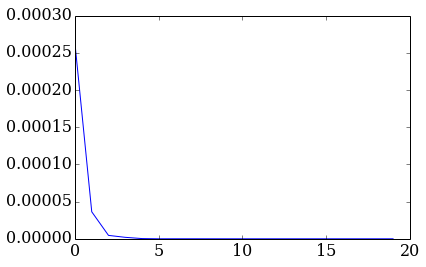

In [453]:
plt.plot(b5[8::9])

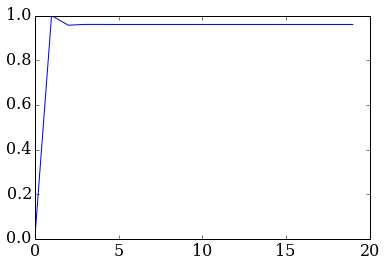

In [485]:
#plt.plot(b5[8::9])
plt.plot(F5[:]/np.max(F5))

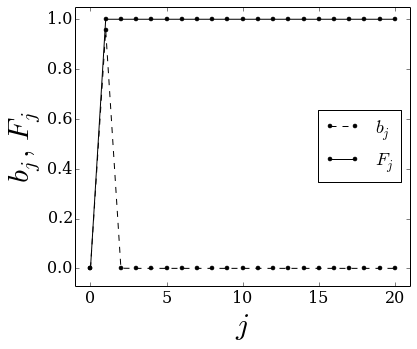

In [463]:
plt.figure(figsize=(6,5))
#plt.plot(F2)
#plt.loglog(D2)
plt.plot(b3, ls='--', c='k', marker='o', ms=4, label='$b_j$')
#plt.loglog(D4)
#plt.plot(b4)
#plt.xlim(-1, 20)
#plt.ylim(-0.1, 1)
plt.plot(F3, c='k', marker='o', ms=4, label='$F_j$')
plt.legend(loc='best', fontsize=18)
plt.xlim(-1, 21)
plt.ylim(-0.07, 1.05)
plt.xlabel('$j$', fontsize=30)
plt.ylabel('$b_j,\ F_j$', fontsize=30)
plt.savefig('bjFjn20Hernquist.png', bbox_inches='tight', dpi=300)

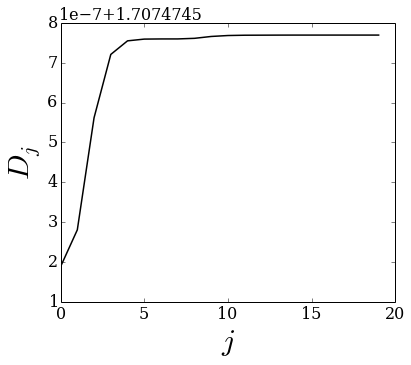

In [546]:
#plt.plot(D3[1:])
plt.figure(figsize=(6,5))
plt.plot(D3[1:], c='k', lw=1.5)
plt.xlabel('$j$', fontsize=30)
plt.ylabel('$D_j$', fontsize=30)

plt.savefig('mise.png', bbox_inches='tight', dpi=300)

In [ ]:
var_aprime(T_trans, a_cov)

In [ ]:
var_aprime(T_trans, a_cov)

In [ ]:
DD4 = np.zeros(len(S4))
for i in range(len(S4)):
    DD4[i] = MISE(S4[0:i+1])

In [ ]:
DD3 = np.zeros(len(S3))
for i in range(len(S3)):
    DD3[i] = MISE(S3[0:i+1])

In [ ]:
plt.semilogy(DD4, lw=2)

In [ ]:
plt.semilogy(DD3, lw=2)

In [ ]:
DD5 = np.zeros(len(S5))
for i in range(len(S5)):
    DD5[i] = MISE(S5[0:i+1])

In [ ]:
plt.semilogy(DD5, lw=2)

In [ ]:
F_k = lambda_prime(lambdas)
S_new3 = a_prime(eigenv, S3)

In [ ]:
print S_new3, S3

In [ ]:
print S_new3

In [ ]:
np.shape(eigenv)

In [ ]:
np.dot(eigenv.T, S6)

In [ ]:
np.sum(lambdas.real[:0])

In [ ]:
plt.plot(F_k)

In [ ]:
DD6 = np.zeros(len(S6))
for i in range(len(S6)):
    DD6[i] = MISE(S6[0:i+1])

In [ ]:
plt.semilogy(DD6, lw=2.0)
plt.xlabel('$S_{n,l,m}$', fontsize=35)

In [ ]:
S_test = S_matrix(SMW3)

In [ ]:
lambdas, eigenv = linalg.eig(S_test)

print len(lambdas)
print np.shape(eigenv)

In [ ]:
print eigenv[0]

In [ ]:
enigenv_t = eigenv.conj().T

In [ ]:
prod = np.dot(eigenv, enigenv_t)

In [ ]:
plt.imshow(np.abs(enigenv_t))
plt.colorbar()

In [ ]:
plt.imshow(np.abs(prod.real))
plt.colorbar()

In [ ]:
np.var([1,1,1,1,1.1])

In [ ]:
linalg.det(eigenv)